In [11]:
import pandas as pd
import numpy as np

In [4]:
X=np.array([-7,2,-3,-11,14,6,8])
# Bucketizing the array into 4 parts
categories = pd.cut(X,4)
categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [5]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [6]:
# Shows in which bucket is each value of the array in
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [8]:
marks = np.array([70,20,40,80,90,10,100])
categories, bins = pd.cut(marks,4,retbins=True, labels=['poor','average','good','excellent'])
categories

['good', 'poor', 'average', 'excellent', 'excellent', 'poor', 'excellent']
Categories (4, object): ['poor' < 'average' < 'good' < 'excellent']

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

In [17]:
marks = [[70],[20],[40],[80],[90],[10],[100]]
encoder = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='uniform')
encoder.fit_transform(marks)

array([[2.],
       [0.],
       [1.],
       [3.],
       [3.],
       [0.],
       [3.]])

In [19]:
# Egdes of each bin
encoder.bin_edges_

array([array([ 10. ,  32.5,  55. ,  77.5, 100. ])], dtype=object)

In [21]:
# This can be used to recreate the orginal points
# encoder.inverse_transform()

In [24]:
automobile = pd.read_csv('datasets/auto_mpg_processed.csv')
automobile.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


In [26]:
X = automobile[['Horsepower']]
Y = automobile[['MPG']]

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([[28.14496405],
       [22.7020866 ],
       [21.79494036],
       [24.81876117],
       [31.47116694],
       [30.5640207 ],
       [25.72590741],
       [10.15323026],
       [28.74972821],
       [20.88779412],
       [29.50568341],
       [14.08419731],
       [16.65444499],
       [29.20330133],
       [22.7020866 ],
       [10.60680338],
       [12.11871379],
       [31.16878486],
       [24.66757013],
       [18.1663554 ],
       [18.31754644],
       [ 6.07107218],
       [27.23781781],
       [26.02828949],
       [26.02828949],
       [16.65444499],
       [28.59853717],
       [28.74972821],
       [24.96995221],
       [24.66757013],
       [25.72590741],
       [18.1663554 ],
       [17.4104002 ],
       [19.82945684],
       [30.26163862],
       [ 7.88536466],
       [26.78424469],
       [25.72590741],
       [28.44734613],
       [25.72590741],
       [18.1663554 ],
       [29.8080655 ],
       [25.72590741],
       [28.74972821],
       [22.7020866 ],
       [26

In [62]:
print('r2 score: ', r2_score(y_test,y_pred))

r2 score:  0.6595817908148651


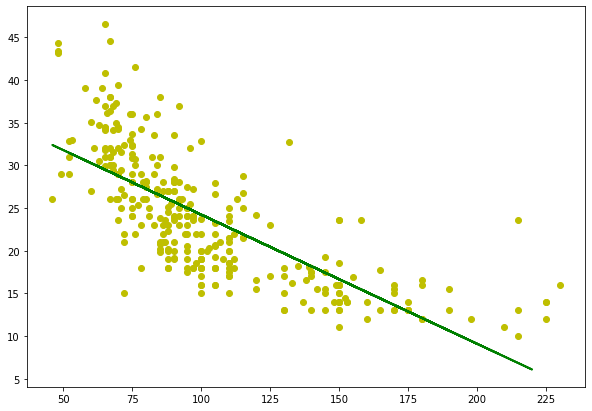

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(x_train,y_train, 'o',c='y')
plt.plot(x_test,y_pred,linewidth=2, color='green',linestyle='-', label='linear regression')
plt.show()

In [77]:
encoder = KBinsDiscretizer(n_bins=20, encode='ordinal')
x_binned = encoder.fit_transform(x_train)
x_test_binned = encoder.transform(x_test)
model = LinearRegression().fit(x_binned,y_train)
y_pred = model.predict(x_test_binned)
print('r2 score: ', r2_score(y_test,y_pred))

r2 score:  0.7204592364662923
